In [5]:
import re

def process_packets(input_file, output_file):
    with open(input_file, 'r') as file:
        data = file.read()

    # Split the packets based on the * MESSAGE... marker
    packets = data.split('* MESSAGE DEBUG PRINT PDU VERBOSE *')

    # Open the output file for writing
    with open(output_file, 'w') as outfile:
        for idx, packet in enumerate(packets):
            if idx == 0:
                continue  # Skip the first split as it will be empty or invalid

            # Find the packet contents and remove unnecessary text
            match = re.search(r'contents =\n((?:\d{4}:.*\n)+)', packet)

            if match:
                # Grab the matched contents and process the lines
                content = match.group(1).strip()
                lines = content.splitlines()

                # Concatenate all lines together and split into groups of 6 bytes
                byte_content = ' '.join([line[6:].strip() for line in lines])  # Remove line numbers
                byte_list = byte_content.split()  # Split into individual bytes

                # Create formatted output in chunks of 6 bytes
                formatted_content = ''
                for i in range(0, len(byte_list), 16):
                    formatted_content += ' '.join(byte_list[i:i+16]) + '\n'

                # Write the packet number and formatted contents to the output file
                outfile.write(f'Packet num: {idx - 1}\nContents:\n{formatted_content}\n')

# Specify the input and output files
input_file = 'E:\\New folder\\1.txt'  # Replace with your input file path
output_file = 'E:\\New folder\\output.txt'  # Replace with your output file path

# Process the packets
process_packets(input_file, output_file)


In [4]:
import re

input_file = 'E:\\New folder\\2.txt'  # Replace with your input file path
output_file = 'E:\\New folder\\output3.txt'  # Replace with your output file path

# Initialize a list to store extracted contents
extracted_contents = []

# Open the input file and read line by line
with open(input_file, 'r') as infile:
    # Read the entire content of the file
    content = infile.read()
    
    # Split the content into packets based on the delimiter of empty lines
    packets = content.split('***********************************')

    # Loop through each packet and extract desired information
    for packet in packets:
        # Extract packet_num and contents using regex
        packet_num_match = re.search(r'\(packet_num \. (\d+)\)', packet)
        contents_match = re.search(r'contents =\n((?:\w{4}: .+\n?)+)', packet)

        if packet_num_match and contents_match:
            packet_num = packet_num_match.group(1)
            contents = contents_match.group(1).strip()

            # Prepare formatted output with packet_num
            formatted_output = f"Packet Number: {packet_num}\nContents:\n{contents}"
            extracted_contents.append(formatted_output)

# Write the extracted contents to the output file
with open(output_file, 'w') as outfile:
    for contents in extracted_contents:
        outfile.write(contents + '\n\n')  # Adding a newline between different packets

print(f"Extracted contents written to {output_file}")


Extracted contents written to E:\New folder\output3.txt


In [6]:
# Read from the input file and write to the output file
input_file_path = 'E:\\New folder\\output3.txt'  # Replace with your input file name
output_file_path = 'E:\\New folder\\output3_new.txt'  # Specify the output file name

with open(input_file_path, 'r') as infile, open(output_file_path, 'w') as outfile:
    packet_num = 0
    packet_contents = []

    for line in infile:
        # Check if the line indicates a new packet
        if line.startswith('Packet Number:'):
            # If there's a previous packet being processed, write it to the output
            if packet_contents:
                outfile.write(f"Packet Number: {packet_num}\nContents:\n")
                outfile.write("\n".join(packet_contents) + "\n\n")

            # Reset for the new packet
            packet_num += 1
            packet_contents = []
        elif line.strip() and not line.startswith('Packet Number:'):
            # Clean the line by removing the address labels and write the content
            cleaned_line = line.split(':', 1)[1].strip()  # Get content after the first colon
            packet_contents.append(cleaned_line)

    # Write the last packet to the output file
    if packet_contents:
        outfile.write(f"Packet Number: {packet_num}\nContents:\n")
        outfile.write("\n".join(packet_contents) + "\n")

print("Output has been written to", output_file_path)


Output has been written to E:\New folder\output3_new.txt


In [ ]:
def convert_packet_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        packet_num = 0
        packet_content = []
        inside_packet = False
        
        for line in infile:
            # Check for packet start
            if line.startswith('* MESSAGE DEBUG PRINT PDU VERBOSE *'):
                if packet_content:  # If there's a previous packet, write it
                    # Format the previous packet
                    formatted_content = f"packet num: {packet_num}, packet contents: {''.join(packet_content)}"
                    outfile.write(formatted_content + '\n')
                    packet_num += 1
                    packet_content = []
                inside_packet = True  # We're now inside a packet
            
            if inside_packet:
                if line.startswith('contents ='):
                    # Extract content lines
                    content = infile.readline().strip()  # Read the line after 'contents ='
                    packet_content.append(content.replace(' ', '').replace(':', '').replace('\n', ''))  # Clean and append

        # Handle the last packet if it exists
        if packet_content:
            formatted_content = f"packet num: {packet_num}, packet contents: {''.join(packet_content)}"
            outfile.write(formatted_content + '\n')

input_file = 'E:\\New folder\\2.txt'  # Replace with your input file path
output_file = 'E:\\New folder\\output2.txt'  # Replace with your output file path
convert_packet_file(input_file, output_file)


In [ ]:
import re

input_file = 'E:\\New folder\\2.txt'  # Replace with your input file path
output_file = 'E:\\New folder\\output2.txt'  # Replace with your output file path

# Initialize a list to store extracted contents
extracted_contents = []

# Open the input file and read line by line
with open(input_file, 'r') as infile:
    # Read the entire content of the file
    content = infile.read()
    
    # Split the content into packets based on the delimiter of empty lines
    packets = content.split('***********************************')

    # Loop through each packet and extract desired information
    for packet in packets:
        # Extract packet_num and contents using regex
        packet_num_match = re.search(r'\(packet_num \. (\d+)\)', packet)
        contents_match = re.search(r'contents =\n((?:\w{4}: .+\n?)+)', packet)

        if packet_num_match and contents_match:
            packet_num = packet_num_match.group(1)
            contents = contents_match.group(1).strip()

            # Append the contents to the list
            extracted_contents.append(contents)

# Write the extracted contents to the output file
with open(output_file, 'w') as outfile:
    for contents in extracted_contents:
        outfile.write(contents + '\n\n')  # Adding a newline between different packets

print(f"Extracted contents written to {output_file}")


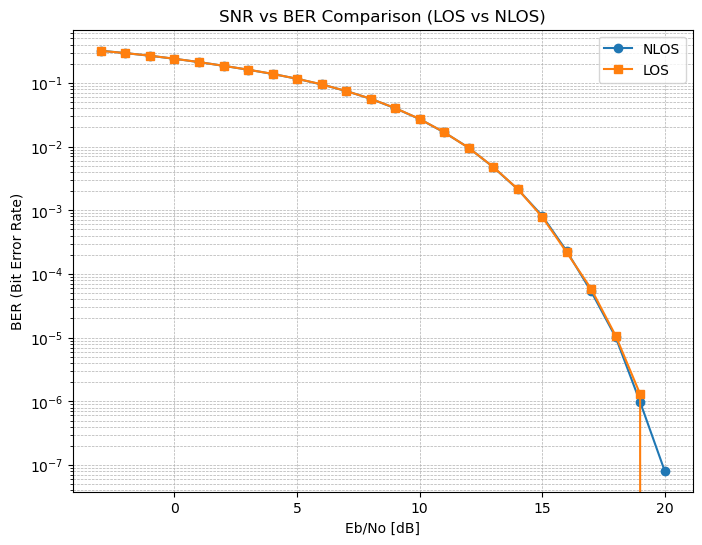

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from NLOS
nlos_data = {
    "EbNo [dB]": [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "BER": [3.2034e-01, 2.9407e-01, 2.6692e-01, 2.3950e-01, 2.1219e-01, 1.8585e-01, 1.6122e-01, 
            1.3845e-01, 1.1617e-01, 9.4654e-02, 7.4722e-02, 5.6450e-02, 4.0113e-02, 2.7141e-02, 
            1.6755e-02, 9.6305e-03, 4.7852e-03, 2.1566e-03, 8.2275e-04, 2.2990e-04, 5.3440e-05, 
            1.0218e-05, 9.7656e-07, 8.1380e-08]
}

# Data from LOS
los_data = {
    "EbNo [dB]": [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "BER": [3.1909e-01, 2.9365e-01, 2.6791e-01, 2.3947e-01, 2.1235e-01, 1.8577e-01, 1.6155e-01, 
            1.3877e-01, 1.1615e-01, 9.5174e-02, 7.4669e-02, 5.6621e-02, 4.0343e-02, 2.7199e-02, 
            1.6844e-02, 9.5776e-03, 4.8242e-03, 2.1688e-03, 7.9183e-04, 2.1932e-04, 5.8594e-05, 
            1.0760e-05, 1.3021e-06, 0.0000e+00]
}

# Convert to DataFrames
nlos_df = pd.DataFrame(nlos_data)
los_df = pd.DataFrame(los_data)

# Plot SNR vs BER
plt.figure(figsize=(8, 6))
plt.semilogy(nlos_df["EbNo [dB]"], nlos_df["BER"], marker='o', linestyle='-', label="NLOS")
plt.semilogy(los_df["EbNo [dB]"], los_df["BER"], marker='s', linestyle='-', label="LOS")

plt.xlabel("Eb/No [dB]")
plt.ylabel("BER (Bit Error Rate)")
plt.title("SNR vs BER Comparison (LOS vs NLOS)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


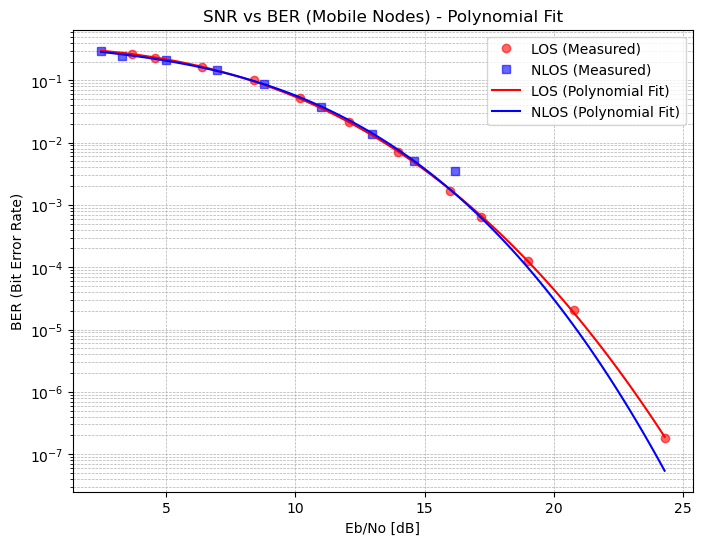

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define a polynomial fit function (logarithmic scale for BER)
def poly_fit(x, a, b, c, d):
    return np.exp(a * x**3 + b * x**2 + c * x + d)

# Given data from mobile nodes (LOS and NLOS)
snr_los = np.array([9.7, 10.6, 12.4, 14.4, 16.2, 18.1, 20.0, 22.0, 23.2, 25.0, 26.8, 28.6, 30.3])
ber_los = np.array([2.607481e-01, 2.286120e-01, 1.659533e-01, 9.922539e-02, 5.175289e-02, 2.105476e-02, 
                    7.015193e-03, 1.674158e-03, 6.517002e-04, 1.250874e-04, 2.033247e-05, 0.000000e+00, 1.836777e-07])

snr_nlos = np.array([8.5, 9.3, 11.0, 13.0, 14.8, 17.0, 19.0, 20.6, 22.2])
ber_nlos = np.array([2.979167e-01, 2.440654e-01, 2.079854e-01, 1.441587e-01, 8.658947e-02, 3.783018e-02, 
                      1.397130e-02, 5.134645e-03, 3.494610e-03])

# Convert SNR to Eb/N0 for 16-QAM (Eb/N0 = SNR - 6.02)
ebno_los = snr_los - 6.02
ebno_nlos = snr_nlos - 6.02

# Remove zero BER values for stable fitting
valid_indices_los = ber_los > 0
valid_indices_nlos = ber_nlos > 0

ebno_los_valid = ebno_los[valid_indices_los]
ber_los_valid = ber_los[valid_indices_los]

ebno_nlos_valid = ebno_nlos[valid_indices_nlos]
ber_nlos_valid = ber_nlos[valid_indices_nlos]

# Exclude the last point of NLOS for fitting but keep it in the graph
ebno_nlos_trimmed = ebno_nlos_valid[:-1]
ber_nlos_trimmed = ber_nlos_valid[:-1]

# Convert BER to log scale for stable polynomial fitting
log_ber_los = np.log(ber_los_valid)
log_ber_nlos_trimmed = np.log(ber_nlos_trimmed)

# Fit the polynomial function to log(BER) values
params_los, _ = curve_fit(lambda x, a, b, c, d: a * x**3 + b * x**2 + c * x + d, 
                          ebno_los_valid, log_ber_los, maxfev=10000)
params_nlos_trimmed, _ = curve_fit(lambda x, a, b, c, d: a * x**3 + b * x**2 + c * x + d, 
                                   ebno_nlos_trimmed, log_ber_nlos_trimmed, maxfev=10000)

# Generate fitted BER values using the polynomial model
ebno_range = np.linspace(min(ebno_nlos), max(ebno_los), 100)
ber_fit_los = np.exp(params_los[0] * ebno_range**3 + params_los[1] * ebno_range**2 + 
                      params_los[2] * ebno_range + params_los[3])
ber_fit_nlos_trimmed = np.exp(params_nlos_trimmed[0] * ebno_range**3 + params_nlos_trimmed[1] * ebno_range**2 + 
                              params_nlos_trimmed[2] * ebno_range + params_nlos_trimmed[3])

# Plot the final polynomial fit with the last NLOS point excluded from fit
plt.figure(figsize=(8, 6))
plt.semilogy(ebno_los, ber_los, 'ro', label="LOS (Measured)", alpha=0.6)
plt.semilogy(ebno_nlos, ber_nlos, 'bs', label="NLOS (Measured)", alpha=0.6)
plt.semilogy(ebno_range, ber_fit_los, 'r-', label="LOS (Polynomial Fit)")
plt.semilogy(ebno_range, ber_fit_nlos_trimmed, 'b-', label="NLOS (Polynomial Fit)")

plt.xlabel("Eb/No [dB]")
plt.ylabel("BER (Bit Error Rate)")
plt.title("SNR vs BER (Mobile Nodes) - Polynomial Fit")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
